# Sample Midterm Exam: CNN

In [1]:
from glob import glob

import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Task 1

<div class="alert alert-block alert-info">

Load a pre-trained **ResNet50** model. If using Keras, load the model from [`keras.applications`](https://keras.io/api/applications/resnet/#resnet50-function). If using PyTorch, use [`torchvision.models`](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html).


*Rubric*
- **1pt** Correct loading of pre-trained model

</div>

In [3]:
input_shape = (224, 224, 3)

conv_base = keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
    classes=1_000,
    classifier_activation='softmax',
)

In [4]:
conv_base.trainable = False

In [5]:
def make_model():
    # Set input as arbitrary
    inputs = keras.Input(shape=input_shape)

    # Replicate preprocessing done by ResNet
    x = keras.applications.resnet.preprocess_input(inputs)

    outputs = conv_base(x)

    return keras.Model(inputs, outputs)

In [6]:
model = make_model()

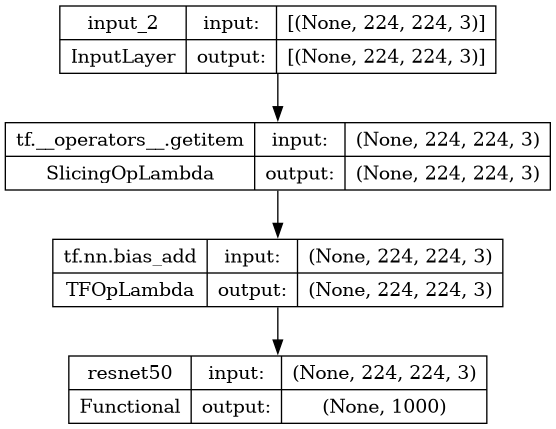

In [7]:
keras.utils.plot_model(model, show_shapes=True)

## Task 2

<div class="alert alert-block alert-info">

Using ResNet50, run inference on the images included with the exam: `car.jpg`, `cat.jpg`, `dog.jpg`. Display the model's output for each (label and probability score) alongside a visualization of the image (e.g. using `matplotlib.pyplot.show`).



*Rubric*
- **2pts** Model inference is properly done for each item
- **2pts** Label, probability score, and image are shown for each item

</div>

In [8]:
img_filepaths = glob('data/*.jpg')

1/1 [==============================] - 0s 38ms/step


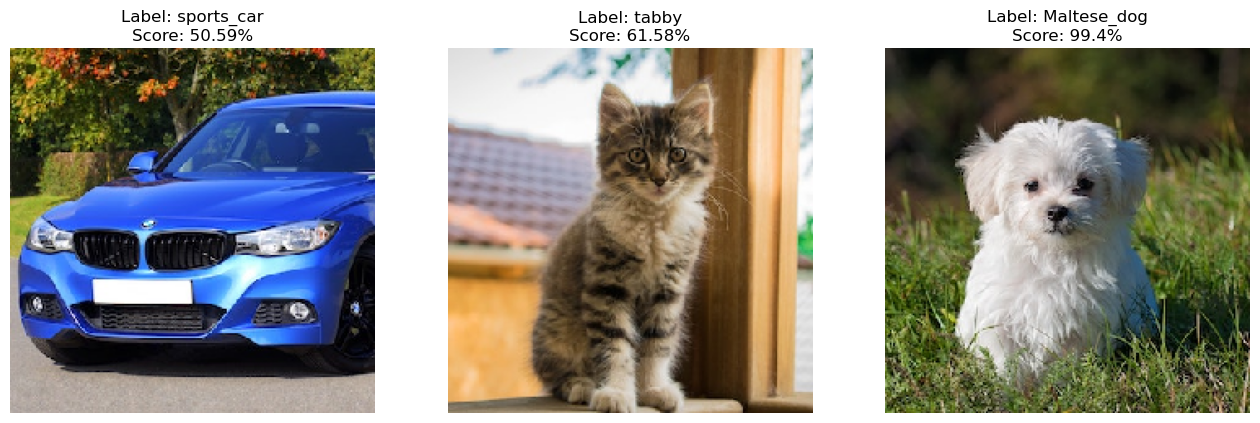

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for i in range(len(img_filepaths)):
    # Prepare image array
    img = keras.utils.load_img(img_filepaths[i], target_size=input_shape)
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Generate prediction
    predictions = model.predict(img_array)
    _, label, probability_score = keras.applications.resnet.decode_predictions(
        predictions, top=1
    )[0][0]

    # Plot image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}\nScore: {round(probability_score * 100, 2)}%')

## References

1. **Keras Applications API** - https://keras.io/api/applications/resnet/#resnet50-function
2. **ResNet Paper** - https://arxiv.org/abs/1512.03385
3. **Leveraging a pre-trained model** - Chapter 8.3, Deep Learning with Python by Chollet (2nd Edition)
4. **Image Classification from Scratch** - https://keras.io/examples/vision/image_classification_from_scratch/